In [1]:
import os
import mne
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ICA rejection

In [13]:
import os
import mne
import sklearn
from mne.preprocessing import (ICA, create_eog_epochs)


def ica_rejection(f, path):
    
    #Load 
    sample_data_folder = path # path to the .fif file 
    sample_data_raw_file = sample_data_folder+"/"+f
    raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file

    # Adjust digitization
    raw.set_channel_types(mapping = {'EOGhr': "eog",'EOGhl': "eog", 'EOGvo': "eog",'EOGvu': "eog"})
    
    # Set up and fit the ICA
    raw_filtered = raw.filter(l_freq = 1, h_freq = 100)
    ica = ICA(n_components = 30 , max_iter= "auto", random_state= 97) 
    ica.fit(raw_filtered)
       
    # Excluding 
    ica.exclude = []
    fp = open("ICA_rejection.txt", "r") # ICA_rejection.txt is a text file where we noted down the components to remove for each participant afert visual inspection
    part = f[7:15] 
    eog_indices = []
    while True:
        text = fp.readline()
        if text == "":
            break
        else:
            text = text.split("-")
            if text[0] == part:
                text_1 = text[1].split(",")
                for n in text_1:
                    if "\n" in n:
                        new_n = n.strip()
                        eog_indices.append(int(new_n))
                    else:
                        eog_indices.append(int(n))
            else:
                continue

    print("EXCLUDED COMPONENTS {}".format(eog_indices))      
    ica.exclude = eog_indices

    # APPLY the ica model to the file 
    ica.apply(raw_filtered)
    
    # Save the new filtered ICA files
    new_name = f[0:15]+"_ica_raw.fif"
    raw_filtered.save(fname = "ICA/"+new_name, overwrite = True)

In [15]:
# Do ICA rejection
for iFile in os.listdir("EVENTS_UPDATED"):
    if iFile != ".ipynb_checkpoints":
        ica_rejection(iFile, "EVENTS_UPDATED")
    else:
        continue

Opening raw data file EVENTS_UPDATED/SYMUL2_EPM08_DT_evup_eve.fif...
    Range : 0 ... 1289215 =      0.000 ...  2517.998 secs
Ready.
Reading 0 ... 1289215  =      0.000 ...  2517.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM08_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 32.0s.
EXCLUDED COMPONENTS [2, 16]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM12_LT_evup_eve.fif...
    Range : 0 ... 1147903 =      0.000 ...  2241.998 secs
Ready.
Reading 0 ... 1147903  =      0.000 ...  2241.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM12_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 24.0s.
EXCLUDED COMPONENTS [0, 23]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM07_LT_evup_eve.fif...
    Range : 0 ... 1226239 =      0.000 ...  2394.998 secs
Ready.
Reading 0 ... 1226239  =      0.000 ...  2394.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM07_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 21.2s.
EXCLUDED COMPONENTS [1, 2, 10]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM10_MT_evup_eve.fif...
    Range : 0 ... 1164799 =      0.000 ...  2274.998 secs
Ready.
Reading 0 ... 1164799  =      0.000 ...  2274.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM10_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 24.1s.
EXCLUDED COMPONENTS [1, 4]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM14_LT_evup_eve.fif...
    Range : 0 ... 1172991 =      0.000 ...  2290.998 secs
Ready.
Reading 0 ... 1172991  =      0.000 ...  2290.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM14_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 22.3s.
EXCLUDED COMPONENTS [0, 7]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM04_DT_evup_eve.fif...
    Range : 0 ... 1309183 =      0.000 ...  2556.998 secs
Ready.
Reading 0 ... 1309183  =      0.000 ...  2556.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM04_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 27.4s.
EXCLUDED COMPONENTS [0, 7]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM03_DT_evup_eve.fif...
    Range : 0 ... 1260543 =      0.000 ...  2461.998 secs
Ready.
Reading 0 ... 1260543  =      0.000 ...  2461.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM03_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 17.0s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM03_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM03_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM14_MT_evup_eve.fif...
    Range : 0 ... 1183231 =      0.000 ...  2310.998 secs
Ready.
Reading 0 ... 1183231  =      0.000 ...  2310.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM14_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 28.2s.
EXCLUDED COMPONENTS [0, 5, 15]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM11_DT_evup_eve.fif...
    Range : 0 ... 1252863 =      0.000 ...  2446.998 secs
Ready.
Reading 0 ... 1252863  =      0.000 ...  2446.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM11_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 21.7s.
EXCLUDED COMPONENTS [0, 3, 13]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM16_DT_evup_eve.fif...
    Range : 0 ... 1321471 =      0.000 ...  2580.998 secs
Ready.
Reading 0 ... 1321471  =      0.000 ...  2580.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM16_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 28.2s.
EXCLUDED COMPONENTS [0, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM09_DT_evup_eve.fif...
    Range : 0 ... 1298943 =      0.000 ...  2536.998 secs
Ready.
Reading 0 ... 1298943  =      0.000 ...  2536.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM09_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 29.2s.
EXCLUDED COMPONENTS [0, 5, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM09_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM09_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM08_MT_evup_eve.fif...
    Range : 0 ... 1262079 =      0.000 ...  2464.998 secs
Ready.
Reading 0 ... 1262079  =      0.000 ...  2464.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM08_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 27.7s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM15_MT_evup_eve.fif...
    Range : 0 ... 1203199 =      0.000 ...  2349.998 secs
Ready.
Reading 0 ... 1203199  =      0.000 ...  2349.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM15_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 44.0s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM15_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM15_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM12_DT_evup_eve.fif...
    Range : 0 ... 1248767 =      0.000 ...  2438.998 secs
Ready.
Reading 0 ... 1248767  =      0.000 ...  2438.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM12_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 18.9s.
EXCLUDED COMPONENTS [0, 8, 10]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM10_DT_evup_eve.fif...
    Range : 0 ... 1280511 =      0.000 ...  2500.998 secs
Ready.
Reading 0 ... 1280511  =      0.000 ...  2500.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM10_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 18.3s.
EXCLUDED COMPONENTS [0, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM17_LT_evup_eve.fif...
    Range : 0 ... 1184767 =      0.000 ...  2313.998 secs
Ready.
Reading 0 ... 1184767  =      0.000 ...  2313.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM17_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 28.1s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM13_LT_evup_eve.fif...
    Range : 0 ... 1194495 =      0.000 ...  2332.998 secs
Ready.
Reading 0 ... 1194495  =      0.000 ...  2332.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM13_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 27.8s.
EXCLUDED COMPONENTS [0, 2, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM16_MT_evup_eve.fif...
    Range : 0 ... 1236479 =      0.000 ...  2414.998 secs
Ready.
Reading 0 ... 1236479  =      0.000 ...  2414.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM16_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 37.2s.
EXCLUDED COMPONENTS [0, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM17_DT_evup_eve.fif...
    Range : 0 ... 1328639 =      0.000 ...  2594.998 secs
Ready.
Reading 0 ... 1328639  =      0.000 ...  2594.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM17_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 33.8s.
EXCLUDED COMPONENTS [0, 1, 7]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM02_MT_evup_eve.fif...
    Range : 0 ... 1198079 =      0.000 ...  2339.998 secs
Ready.
Reading 0 ... 1198079  =      0.000 ...  2339.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM02_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 17.6s.
EXCLUDED COMPONENTS [1, 10]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM06_LT_evup_eve.fif...
    Range : 0 ... 1210367 =      0.000 ...  2363.998 secs
Ready.
Reading 0 ... 1210367  =      0.000 ...  2363.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM06_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 21.8s.
EXCLUDED COMPONENTS [0, 2, 10, 14]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM09_LT_evup_eve.fif...
    Range : 0 ... 1198079 =      0.000 ...  2339.998 secs
Ready.
Reading 0 ... 1198079  =      0.000 ...  2339.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM09_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Fitting ICA took 33.3s.
EXCLUDED COMPONENTS [0, 3, 7, 14]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM07_DT_evup_eve.fif...
    Range : 0 ... 1246719 =      0.000 ...  2434.998 secs
Ready.
Reading 0 ... 1246719  =      0.000 ...  2434.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM07_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 19.2s.
EXCLUDED COMPONENTS [0, 5, 10, 18, 20]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 5 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM11_LT_evup_eve.fif...
    Range : 0 ... 1159167 =      0.000 ...  2263.998 secs
Ready.
Reading 0 ... 1159167  =      0.000 ...  2263.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM11_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 16.1s.
EXCLUDED COMPONENTS [0, 2, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM12_MT_evup_eve.fif...
    Range : 0 ... 1144319 =      0.000 ...  2234.998 secs
Ready.
Reading 0 ... 1144319  =      0.000 ...  2234.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM12_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 26.9s.
EXCLUDED COMPONENTS [0, 23]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM12_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM06_MT_evup_eve.fif...
    Range : 0 ... 1212415 =      0.000 ...  2367.998 secs
Ready.
Reading 0 ... 1212415  =      0.000 ...  2367.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM06_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 25.6s.
EXCLUDED COMPONENTS [0, 4, 5, 13, 15]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 5 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM11_MT_evup_eve.fif...
    Range : 0 ... 1181695 =      0.000 ...  2307.998 secs
Ready.
Reading 0 ... 1181695  =      0.000 ...  2307.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM11_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 18.6s.
EXCLUDED COMPONENTS [0, 1]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM11_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM03_MT_evup_eve.fif...
    Range : 0 ... 1168895 =      0.000 ...  2282.998 secs
Ready.
Reading 0 ... 1168895  =      0.000 ...  2282.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM03_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 15.3s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM03_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM03_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM14_DT_evup_eve.fif...
    Range : 0 ... 1285631 =      0.000 ...  2510.998 secs
Ready.
Reading 0 ... 1285631  =      0.000 ...  2510.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM14_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 25.7s.
EXCLUDED COMPONENTS [0, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM14_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM04_LT_evup_eve.fif...
    Range : 0 ... 1187327 =      0.000 ...  2318.998 secs
Ready.
Reading 0 ... 1187327  =      0.000 ...  2318.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM04_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 22.0s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM06_DT_evup_eve.fif...
    Range : 0 ... 1299967 =      0.000 ...  2538.998 secs
Ready.
Reading 0 ... 1299967  =      0.000 ...  2538.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM06_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 24.1s.
EXCLUDED COMPONENTS [0, 1, 2, 10, 13, 15]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 6 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM06_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM13_DT_evup_eve.fif...
    Range : 0 ... 1238015 =      0.000 ...  2417.998 secs
Ready.
Reading 0 ... 1238015  =      0.000 ...  2417.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM13_DT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 26.5s.
EXCLUDED COMPONENTS [0, 10]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_DT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_DT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM17_MT_evup_eve.fif...
    Range : 0 ... 1203199 =      0.000 ...  2349.998 secs
Ready.
Reading 0 ... 1203199  =      0.000 ...  2349.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM17_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 20.2s.
EXCLUDED COMPONENTS [0, 7]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM17_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM10_LT_evup_eve.fif...
    Range : 0 ... 1181695 =      0.000 ...  2307.998 secs
Ready.
Reading 0 ... 1181695  =      0.000 ...  2307.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM10_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 20.1s.
EXCLUDED COMPONENTS [0, 8, 11]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM10_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM07_MT_evup_eve.fif...
    Range : 0 ... 1210367 =      0.000 ...  2363.998 secs
Ready.
Reading 0 ... 1210367  =      0.000 ...  2363.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM07_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 21.0s.
EXCLUDED COMPONENTS [0, 1, 9, 22]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM07_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM16_LT_evup_eve.fif...
    Range : 0 ... 1199615 =      0.000 ...  2342.998 secs
Ready.
Reading 0 ... 1199615  =      0.000 ...  2342.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM16_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 33.2s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM16_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM04_MT_evup_eve.fif...
    Range : 0 ... 1114623 =      0.000 ...  2176.998 secs
Ready.
Reading 0 ... 1114623  =      0.000 ...  2176.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM04_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 25.1s.
EXCLUDED COMPONENTS [0, 6]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM04_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM15_LT_evup_eve.fif...
    Range : 0 ... 1282559 =      0.000 ...  2504.998 secs
Ready.
Reading 0 ... 1282559  =      0.000 ...  2504.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM15_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 39.3s.
EXCLUDED COMPONENTS [0, 4]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM15_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM15_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM09_MT_evup_eve.fif...
    Range : 0 ... 1163263 =      0.000 ...  2271.998 secs
Ready.
Reading 0 ... 1163263  =      0.000 ...  2271.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM09_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 24.6s.
EXCLUDED COMPONENTS [0, 4]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM09_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM09_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM08_LT_evup_eve.fif...
    Range : 0 ... 1177087 =      0.000 ...  2298.998 secs
Ready.
Reading 0 ... 1177087  =      0.000 ...  2298.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM08_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 26.0s.
EXCLUDED COMPONENTS [3, 19]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM08_LT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM13_MT_evup_eve.fif...
    Range : 0 ... 1207295 =      0.000 ...  2357.998 secs
Ready.
Reading 0 ... 1207295  =      0.000 ...  2357.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM13_MT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 25.1s.
EXCLUDED COMPONENTS [0, 9]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_MT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM13_MT_ica_raw.fif
[done]
Opening raw data file EVENTS_UPDATED/SYMUL2_EPM02_LT_evup_eve.fif...
    Range : 0 ... 1159679 =      0.000 ...  2264.998 secs
Ready.
Reading 0 ... 1159679  =      0.000 ...  2264.998 secs...


/tmp/ipykernel_1195375/4020791529.py:12: RuntimeWarning: This filename (EVENTS_UPDATED/SYMUL2_EPM02_LT_evup_eve.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload= True) # this function is to reads .fif file


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 21.3s.
EXCLUDED COMPONENTS [8, 10, 11]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 66 PCA components
Writing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_LT_ica_raw.fif
Closing /home/bkapusi/SYMUL/ICA/SYMUL2_EPM02_LT_ica_raw.fif
[done]


# Epoching and filtering

In [2]:
# Function description for epoching (bandpass filter included)

def epoching(f, path):

    """
    Returns epochs based on the events found in the EEG data.

    Arguments:
        f (str):
        name of the file
        path (str):
        path to the folder that the file is contained in
    """
    
    iFile = path + "/" + f
    raw = mne.io.read_raw_fif( iFile, preload=True, on_split_missing="warn" )

    # Applying a bandpass filter
    lFreq=0.01
    hFreq=30
    
    raw.filter( lFreq, hFreq )
    
    # Define tmin and tmax
    tmin_second_ld = -0.1
    tmax_second_ld = 1.2

    # get condition
    iCondition = f[13:15]

    # Reading from events
    events = mne.find_events( raw, raw.ch_names )

    # selecting events according to possible ids (original events, and shifted events)
    event_ids_og = [111, 112, 113, 114, 115, 116, 117, 118,
                   211, 212, 213, 214, 215, 216, 217, 218,
                   311, 312, 313, 314, 315, 316, 317, 318]
    
    event_ids_shift = [121, 122, 123, 124, 125, 126, 127, 128,
                       221, 222, 223, 224, 225, 226, 227, 228,
                       321, 322, 323, 324, 325, 326, 327, 328]

    events_unq = np.unique( events[:,2] )

    events_set = set( events_unq ) & set( event_ids_shift )
    events_l = [x for x in events_set]

    # Creating epoch files from important event triggers:
    # Baseline correction applied automatically (-100ms)
    epochs = mne.Epochs(raw, events, tmin = tmin_second_ld, tmax = tmax_second_ld, event_id = events_l,
                        verbose = True, preload = True, reject=None, reject_by_annotation=False)

    # Create a copy of the original epochs
    epochs_copy = epochs.copy()

    return epochs_copy

## LT

In [3]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/LT/block1' ):
    if "LT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/LT/block1' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

# Sort the list by subject number (for Block1)
# part_list_sorted = sorted(part_list, key=lambda x: int(x.split('_')[1]))

#concatenate the DataFrames corresponding to each particpant
epochs_lt_b1 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

len(part_list)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM03_LT_ica_raw.fif...
    Range : 0 ... 1177599 =      0.000 ...  2299.998 secs
Ready.
Reading 0 ... 1177599  =      0.000 ...  2299.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM02_LT_ica_raw.fif...
    Range : 0 ... 1159679 =      0.000 ...  2264.998 secs
Ready.
Reading 0 ... 1159679  =      0.000 ...  2264.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 204 214 224 234]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM04_LT_ica_raw.fif...
    Range : 0 ... 1187327 =      0.000 ...  2318.998 secs
Ready.
Reading 0 ... 1187327  =      0.000 ...  2318.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 205 206 207
 208 212 215 216 217 218 222 225 226 227 228 232 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM08_LT_ica_raw.fif...
    Range : 0 ... 1177087 =      0.000 ...  2298.998 secs
Ready.
Reading 0 ... 1177087  =      0.000 ...  2298.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
-------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 207 211 212 213 214 215 217 221 222 223 224 225 227 231 232 233 234
 235 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM07_LT_ica_raw.fif...
    Range : 0 ... 1226239 =      0.000 ...  2394.998 secs
Ready.
Reading 0 ... 1226239  =      0.000 ...  2394.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 212 213 214 215 216 222 223 224 225 226 232 233 234 235 236]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM06_LT_ica_raw.fif...
    Range : 0 ... 1210367 =      0.000 ...  2363.998 secs
Ready.
Reading 0 ... 1210367  =      0.000 ...  2363.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
-------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 208 211
 212 218 221 222 228 231 232 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM10_LT_ica_raw.fif...
    Range : 0 ... 1181695 =      0.000 ...  2307.998 secs
Ready.
Reading 0 ... 1181695  =      0.000 ...  2307.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 206 207
 212 213 216 217 222 223 226 227 232 233 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM09_LT_ica_raw.fif...
    Range : 0 ... 1198079 =      0.000 ...  2339.998 secs
Ready.
Reading 0 ... 1198079  =      0.000 ...  2339.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


1 event found on stim channel GSR2
Event IDs: [262143]
Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM11_LT_ica_raw.fif...
    Range : 0 ... 1159167 =      0.000 ...  2263.998 secs
Ready.
Reading 0 ... 1159167  =      0.000 ...  2263.998 secs...
Filtering raw data in 4 contiguous seg

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM12_LT_ica_raw.fif...
    Range : 0 ... 1147903 =      0.000 ...  2241.998 secs
Ready.
Reading 0 ... 1147903  =      0.000 ...  2241.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 208
 212 213 214 218 222 223 224 228 232 233 234 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM13_LT_ica_raw.fif...
    Range : 0 ... 1194495 =      0.000 ...  2332.998 secs
Ready.
Reading 0 ... 1194495  =      0.000 ...  2332.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 206 207 208
 211 216 217 218 221 226 227 228 231 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM14_LT_ica_raw.fif...
    Range : 0 ... 1172991 =      0.000 ...  2290.998 secs
Ready.
Reading 0 ... 1172991  =      0.000 ...  2290.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 205
 206 207 208 211 212 213 215 216 217 218 221 222 223 225 226 227 228 231
 232 233 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM16_LT_ica_raw.fif...
    Range : 0 ... 1199615 =      0.000 ...  2342.998 secs
Ready.
Reading 0 ... 1199615  =      0.000 ...  2342.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 205 207
 208 212 213 215 217 218 222 223 225 227 228 232 233 235 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM15_LT_ica_raw.fif...
    Range : 0 ... 1282559 =      0.000 ...  2504.998 secs
Ready.
Reading 0 ... 1282559  =      0.000 ...  2504.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
-------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 204 205 214 215
 224 225 234 235]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block1/SYMUL2_EPM17_LT_ica_raw.fif...
    Range : 0 ... 1184767 =      0.000 ...  2313.998 secs
Ready.
Reading 0 ... 1184767  =      0.000 ...  2313.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 207 217 227 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped


In [4]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_lt_b1.columns = ch_names[:epochs_lt_b1.shape[1]]

In [5]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/LT/block2' ):
    if "LT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/LT/block2' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

# Sort the list by subject number (for Block1)
# part_list_sorted = sorted(part_list, key=lambda x: int(x.split('_')[1]))

#concatenate the DataFrames corresponding to each particpant
epochs_lt_b2 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

len(part_list)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM27_LT_ica_raw.fif...
    Range : 0 ... 1287679 =      0.000 ...  2514.998 secs
Ready.
Reading 0 ... 1287679  =      0.000 ...  2514.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 203 206 207
 211 213 216 217 221 223 226 227 231 233 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM23_LT_ica_raw.fif...
    Range : 0 ... 1212927 =      0.000 ...  2368.998 secs
Ready.
Reading 0 ... 1212927  =      0.000 ...  2368.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 203 204 205 206
 207 208 213 214 215 216 217 218 223 224 225 226 227 228 233 234 235 236
 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM26_LT_ica_raw.fif...
    Range : 0 ... 1032703 =      0.000 ...  2016.998 secs
Ready.
Reading 0 ... 1032703  =      0.000 ...  2016.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 205 206
 207 211 212 215 216 217 221 222 225 226 227 231 232 235 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM21_LT_ica_raw.fif...
    Range : 0 ... 1058303 =      0.000 ...  2066.998 secs
Ready.
Reading 0 ... 1058303  =      0.000 ...  2066.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 203 206 208 213
 216 218 223 226 228 233 236 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM24_LT_ica_raw.fif...
    Range : 0 ... 1320959 =      0.000 ...  2579.998 secs
Ready.
Reading 0 ... 1320959  =      0.000 ...  2579.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 212 222 232]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM22_LT_ica_raw.fif...
    Range : 0 ... 1096703 =      0.000 ...  2141.998 secs
Ready.
Reading 0 ... 1096703  =      0.000 ...  2141.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 207 211 212 213 214 215 217 221 222 223 224 225 227 231 232 233 234
 235 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM28_LT_ica_raw.fif...
    Range : 0 ... 2869759 =      0.000 ...  5604.998 secs
Ready.
Reading 0 ... 2869759  =      0.000 ...  5604.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 204 205 206 207
 208 214 215 216 217 218 224 225 226 227 228 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM29_LT_ica_raw.fif...
    Range : 0 ... 1061887 =      0.000 ...  2073.998 secs
Ready.
Reading 0 ... 1061887  =      0.000 ...  2073.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 206
 207 208 212 213 214 216 217 218 222 223 224 226 227 228 232 233 234 236
 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM30_LT_ica_raw.fif...
    Range : 0 ... 1126911 =      0.000 ...  2200.998 secs
Ready.
Reading 0 ... 1126911  =      0.000 ...  2200.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 203 206 207
 211 213 216 217 221 223 226 227 231 233 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM32_LT_ica_raw.fif...
    Range : 0 ... 1076223 =      0.000 ...  2101.998 secs
Ready.
Reading 0 ... 1076223  =      0.000 ...  2101.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM31_LT_ica_raw.fif...
    Range : 0 ... 1222143 =      0.000 ...  2386.998 secs
Ready.
Reading 0 ... 1222143  =      0.000 ...  2386.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 204 208 212
 214 218 222 224 228 232 234 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/LT/block2/SYMUL2_EPM33_LT_ica_raw.fif...
    Range : 0 ... 1256447 =      0.000 ...  2453.998 secs
Ready.
Reading 0 ... 1256447  =      0.000 ...  2453.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped


In [6]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_lt_b2.columns = ch_names[:epochs_lt_b2.shape[1]]

In [7]:
# Extract columns of interest
epochs_lt_b1_ed = epochs_lt_b1[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]
epochs_lt_b2_ed = epochs_lt_b2[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]

In [8]:
# Concatenate the two blocks
epochs_lt_all=pd.concat( [epochs_lt_b1_ed,epochs_lt_b2_ed] )

In [9]:
# Sort values by subject number
epochs_lt_all.sort_values( by=['Subject', 'Epoch', 'Time'], inplace=True )
epochs_lt_all.reset_index( drop=True, inplace=True )

## MT

In [3]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/MT/block1' ):
    if "MT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/MT/block1' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

#concatenate the DataFrames corresponding to each particpant
epochs_mt_b1 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM03_MT_ica_raw.fif...
    Range : 0 ... 1168895 =      0.000 ...  2282.998 secs
Ready.
Reading 0 ... 1168895  =      0.000 ...  2282.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM02_MT_ica_raw.fif...
    Range : 0 ... 1198079 =      0.000 ...  2339.998 secs
Ready.
Reading 0 ... 1198079  =      0.000 ...  2339.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 205 215 225 235]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM04_MT_ica_raw.fif...
    Range : 0 ... 1114623 =      0.000 ...  2176.998 secs
Ready.
Reading 0 ... 1114623  =      0.000 ...  2176.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238 301 302 303 304 305 306 307 308
 311 312 313 314 315 316 317 318 321 322 323 324 325 326 327 328 331 332
 333 334 335 336 337 338]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM07_MT_ica_raw.fif...
    Range : 0 ... 1210367 =      0.000 ...  2363.998 secs
Ready.
Readi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM08_MT_ica_raw.fif...
    Range : 0 ... 1262079 =      0.000 ...  2464.998 secs
Ready.
Reading 0 ... 1262079  =      0.000 ...  2464.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 203 204 206
 208 211 213 214 216 218 221 223 224 226 228 231 233 234 236 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM06_MT_ica_raw.fif...
    Range : 0 ... 1212415 =      0.000 ...  2367.998 secs
Ready.
Reading 0 ... 1212415  =      0.000 ...  2367.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
-------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 204 205
 206 207 208 211 212 214 215 216 217 218 221 222 224 225 226 227 228 231
 232 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM10_MT_ica_raw.fif...
    Range : 0 ... 1164799 =      0.000 ...  2274.998 secs
Ready.
Reading 0 ... 1164799  =      0.000 ...  2274.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 208 212 213 214 215 216 218 222 223 224 225 226 228 232 233 234 235
 236 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM13_MT_ica_raw.fif...
    Range : 0 ... 1207295 =      0.000 ...  2357.998 secs
Ready.
Reading 0 ... 1207295  =      0.000 ...  2357.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM09_MT_ica_raw.fif...
    Range : 0 ... 1163263 =      0.000 ...  2271.998 secs
Ready.
Reading 0 ... 1163263  =      0.000 ...  2271.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 205 206
 207 208 212 213 215 216 217 218 222 223 225 226 227 228 232 233 235 236
 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM11_MT_ica_raw.fif...
    Range : 0 ... 1181695 =      0.000 ...  2307.998 secs
Ready.
Reading 0 ... 1181695  =      0.000 ...  2307.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM12_MT_ica_raw.fif...
    Range : 0 ... 1144319 =      0.000 ...  2234.998 secs
Ready.
Reading 0 ... 1144319  =      0.000 ...  2234.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 203 206 207 213
 216 217 223 226 227 233 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM14_MT_ica_raw.fif...
    Range : 0 ... 1183231 =      0.000 ...  2310.998 secs
Ready.
Reading 0 ... 1183231  =      0.000 ...  2310.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 208 212 213 214 215 216 218 222 223 224 225 226 228 232 233 234 235
 236 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM15_MT_ica_raw.fif...
    Range : 0 ... 1203199 =      0.000 ...  2349.998 secs
Ready.
Reading 0 ... 1203199  =      0.000 ...  2349.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM16_MT_ica_raw.fif...
    Range : 0 ... 1236479 =      0.000 ...  2414.998 secs
Ready.
Reading 0 ... 1236479  =      0.000 ...  2414.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 208 212 218
 222 228 232 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block1/SYMUL2_EPM17_MT_ica_raw.fif...
    Range : 0 ... 1203199 =      0.000 ...  2349.998 secs
Ready.
Reading 0 ... 1203199  =      0.000 ...  2349.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


1 event found on stim channel GSR1
Event IDs: [262143]
1 event found on stim channel GSR2
Event IDs: [262143]
Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...


/tmp/ipykernel_904416/3898790190.py:32: RuntimeWarning: Some events are duplicated in your different stim channels. 1 events were ignored during deduplication.
  events = mne.find_events( raw, raw.ch_names )


0 bad epochs dropped


In [4]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_mt_b1.columns = ch_names[:epochs_mt_b1.shape[1]]

In [5]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/MT/block2' ):
    if "MT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/MT/block2' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

#concatenate the DataFrames corresponding to each particpant
epochs_mt_b2 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM22_MT_ica_raw.fif...
    Range : 0 ... 1117183 =      0.000 ...  2181.998 secs
Ready.
Reading 0 ... 1117183  =      0.000 ...  2181.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 205 206
 207 208 212 213 215 216 217 218 222 223 225 226 227 228 232 233 235 236
 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM26_MT_ica_raw.fif...
    Range : 0 ... 1077247 =      0.000 ...  2103.998 secs
Ready.
Reading 0 ... 1077247  =      0.000 ...  2103.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 204 205 207
 212 214 215 217 222 224 225 227 232 234 235 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM21_MT_ica_raw.fif...
    Range : 0 ... 1056255 =      0.000 ...  2062.998 secs
Ready.
Reading 0 ... 1056255  =      0.000 ...  2062.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 212 213 214 215 216 222 223 224 225 226 232 233 234 235 236]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM24_MT_ica_raw.fif...
    Range : 0 ... 1096191 =      0.000 ...  2140.998 secs
Ready.
Reading 0 ... 1096191  =      0.000 ...  2140.998 secs...
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 208 211 212 213 214 215 216 218 221 222 223 224 225 226 228 231
 232 233 234 235 236 238 307 317 327 337]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM23_MT_ica_raw.fif...
    Range : 0 ... 1223167 =      0.000 ...  2388.998 secs
Ready.
Reading 0 ... 1223167  =      0.000 ...  2388.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM27_MT_ica_raw.fif...
    Range : 0 ... 1280511 =      0.000 ...  2500.998 secs
Ready.
Reading 0 ... 1280511  =      0.000 ...  2500.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM29_MT_ica_raw.fif...
    Range : 0 ... 1122815 =      0.000 ...  2192.998 secs
Ready.
Reading 0 ... 1122815  =      0.000 ...  2192.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 207 211 212 213 214 215 217 221 222 223 224 225 227 231 232 233 234
 235 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM28_MT_ica_raw.fif...
    Range : 0 ... 1231871 =      0.000 ...  2405.998 secs
Ready.
Reading 0 ... 1231871  =      0.000 ...  2405.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 107 111 112 113 114 115 117 121 122 123 124 125 127
 131 132 133 134 135 137 201 205 206 207 208 211 215 216 217 218 221 225
 226 227 228 231 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM30_MT_ica_raw.fif...
    Range : 0 ... 1121279 =      0.000 ...  2189.998 secs
Ready.
Reading 0 ... 1121279  =      0.000 ...  2189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 204 205
 206 207 208 211 212 214 215 216 217 218 221 222 224 225 226 227 228 231
 232 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM33_MT_ica_raw.fif...
    Range : 0 ... 1207807 =      0.000 ...  2358.998 secs
Ready.
Reading 0 ... 1207807  =      0.000 ...  2358.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM31_MT_ica_raw.fif...
    Range : 0 ... 1833983 =      0.000 ...  3581.998 secs
Ready.
Reading 0 ... 1833983  =      0.000 ...  3581.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/MT/block2/SYMUL2_EPM32_MT_ica_raw.fif...
    Range : 0 ... 1152511 =      0.000 ...  2250.998 secs
Ready.
Reading 0 ... 1152511  =      0.000 ...  2250.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 107 111 112 113 114 115 117 121 122 123 124 125 127
 131 132 133 134 135 137 201 202 203 206 207 208 211 212 213 216 217 218
 221 222 223 226 227 228 231 232 233 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped


In [6]:
# These two are foulty, storing them for later correction
part24=globals()[part_list[3]]
part27=globals()[part_list[5]]

In [7]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_mt_b2.columns = ch_names[:epochs_mt_b2.shape[1]]

In [8]:
# Extract columns of interest
epochs_mt_b1_ed = epochs_mt_b1[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]
epochs_mt_b2_ed = epochs_mt_b2[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]

In [9]:
# Concatenate the two blocks
epochs_mt_all=pd.concat( [epochs_mt_b1_ed,epochs_mt_b2_ed] )

In [10]:
# Sort values by subject number
epochs_mt_all.sort_values( by=['Subject', 'Epoch', 'Time'], inplace=True )
epochs_mt_all.reset_index(drop=True, inplace=True)

## DT

In [11]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/DT/block1' ):
    if "DT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/DT/block1' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

#concatenate the DataFrames corresponding to each particpant
epochs_dt_b1 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM17_DT_ica_raw.fif...
    Range : 0 ... 1328639 =      0.000 ...  2594.998 secs
Ready.
Reading 0 ... 1328639  =      0.000 ...  2594.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM16_DT_ica_raw.fif...
    Range : 0 ... 1321471 =      0.000 ...  2580.998 secs
Ready.
Reading 0 ... 1321471  =      0.000 ...  2580.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 211 212 213 214 215 216 217 221 222 223 224 225 226 227 231
 232 233 234 235 236 237]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM15_DT_ica_raw.fif...
    Range : 0 ... 1243135 =      0.000 ...  2427.998 secs
Ready.
Reading 0 ... 1243135  =      0.000 ...  2427.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 203 204 213 214
 223 224 233 234]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM14_DT_ica_raw.fif...
    Range : 0 ... 1285631 =      0.000 ...  2510.998 secs
Ready.
Reading 0 ... 1285631  =      0.000 ...  2510.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 206 207 208 211 212 213 214 216 217 218 221 222 223 224 226 227 228 231
 232 233 234 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM13_DT_ica_raw.fif...
    Range : 0 ... 1238015 =      0.000 ...  2417.998 secs
Ready.
Reading 0 ... 1238015  =      0.000 ...  2417.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM12_DT_ica_raw.fif...
    Range : 0 ... 1248767 =      0.000 ...  2438.998 secs
Ready.
Reading 0 ... 1248767  =      0.000 ...  2438.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM11_DT_ica_raw.fif...
    Range : 0 ... 1252863 =      0.000 ...  2446.998 secs
Ready.
Reading 0 ... 1252863  =      0.000 ...  2446.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM09_DT_ica_raw.fif...
    Range : 0 ... 1298943 =      0.000 ...  2536.998 secs
Ready.
Reading 0 ... 1298943  =      0.000 ...  2536.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 203 204 205
 206 207 208 211 213 214 215 216 217 218 221 223 224 225 226 227 228 231
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM10_DT_ica_raw.fif...
    Range : 0 ... 1280511 =      0.000 ...  2500.998 secs
Ready.
Reading 0 ... 1280511  =      0.000 ...  2500.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM07_DT_ica_raw.fif...
    Range : 0 ... 1246719 =      0.000 ...  2434.998 secs
Ready.
Reading 0 ... 1246719  =      0.000 ...  2434.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 205 206 207 208
 215 216 217 218 225 226 227 228 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM08_DT_ica_raw.fif...
    Range : 0 ... 1289215 =      0.000 ...  2517.998 secs
Ready.
Reading 0 ... 1289215  =      0.000 ...  2517.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 206 207 208
 212 216 217 218 222 226 227 228 232 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM06_DT_ica_raw.fif...
    Range : 0 ... 1299967 =      0.000 ...  2538.998 secs
Ready.
Reading 0 ... 1299967  =      0.000 ...  2538.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 207 208 211 212 213 214 217 218 221 222 223 224 227 228 231 232 233 234
 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM03_DT_ica_raw.fif...
    Range : 0 ... 1260543 =      0.000 ...  2461.998 secs
Ready.
Reading 0 ... 1260543  =      0.000 ...  2461.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 203 204 205
 206 207 208 211 213 214 215 216 217 218 221 223 224 225 226 227 228 231
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM04_DT_ica_raw.fif...
    Range : 0 ... 1309183 =      0.000 ...  2556.998 secs
Ready.
Reading 0 ... 1309183  =      0.000 ...  2556.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.01 - 30 Hz

FI

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block1/SYMUL2_EPM02_DT_ica_raw.fif...
    Range : 0 ... 1874943 =      0.000 ...  3661.998 secs
Ready.
Reading 0 ... 1874943  =      0.000 ...  3661.998 secs...
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Trigger channel Temp has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 205 206 211
 215 216 221 225 226 231 235 236]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped


In [12]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_dt_b1.columns = ch_names[:epochs_dt_b1.shape[1]]

In [13]:
# go to parent directory to access data storage
os.chdir( '/home/bkapusi' )

# Epoch data per block, participant, event - could probably do it more effectively
part_list = []
for iFile in os.listdir( 'data/storage_barni/icaRemoved/DT/block2' ):
    if "DT" in iFile:
        epochs = epoching( iFile, 'data/storage_barni/icaRemoved/DT/block2' )
        subject_num = int( iFile[10:12] )

        epochs_list = []

        for i in range( 288 ):
            # Get the data from the Epochs object
            epoch_data = epochs.get_data(copy=False)[i]

            # Convert the data to a pandas DataFrame
            epoch_df = pd.DataFrame( epoch_data )
            epoch_res = epoch_df.transpose()

            # Adding epoch and subject number, and time to the DataFrame
            epoch_res['Epoch'] = [i+1 for x in range( epoch_res.shape[0] )]
            epoch_res['Subject'] = [subject_num for x in range( epoch_res.shape[0] )]
            epoch_res['Time'] = [ -0.1 + i*(1.2/615) for i in range( 666 )]

            # Append the single epoch name to the list
            epochs_list.append( f'epoch_{i+1}' )

            # Assign the DataFrame to a variable with a dynamic name
            exec( f'epoch_{i+1} = epoch_res' )

        # Concatenate the epoch file for a particpant
        epochs_per_part = pd.concat([globals()[epoch] for epoch in epochs_list], ignore_index=True)

        # Append the name of the epochs file per particpant and assign the DataFrame to a varibale
        part_list.append( f'particpant_{subject_num}' )
        exec( f'particpant_{subject_num} = epochs_per_part' )

# Sort the list by subject number (for Block2)
part_list.sort()

#concatenate the DataFrames corresponding to each particpant
epochs_dt_b2 = pd.concat([globals()[part_file] for part_file in part_list], ignore_index=True)

# Go back to SYMUL directory
os.chdir( 'SYMUL' )

Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM23_DT_ica_raw.fif...
    Range : 0 ... 1661951 =      0.000 ...  3245.998 secs
Ready.
Reading 0 ... 1661951  =      0.000 ...  3245.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 168961 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.1s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM26_DT_ica_raw.fif...
    Range : 0 ... 1459711 =      0.000 ...  2850.998 secs
Ready.
Reading 0 ... 1459711  =      0.000 ...  2850.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM22_DT_ica_raw.fif...
    Range : 0 ... 1186815 =      0.000 ...  2317.998 secs
Ready.
Reading 0 ... 1186815  =      0.000 ...  2317.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM21_DT_ica_raw.fif...
    Range : 0 ... 1143807 =      0.000 ...  2233.998 secs
Ready.
Reading 0 ... 1143807  =      0.000 ...  2233.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM24_DT_ica_raw.fif...
    Range : 0 ... 1191423 =      0.000 ...  2326.998 secs
Ready.
Reading 0 ... 1191423  =      0.000 ...  2326.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM27_DT_ica_raw.fif...
    Range : 0 ... 1411071 =      0.000 ...  2755.998 secs
Ready.
Reading 0 ... 1411071  =      0.000 ...  2755.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 204 205
 206 207 208 211 212 214 215 216 217 218 221 222 224 225 226 227 228 231
 232 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM29_DT_ica_raw.fif...
    Range : 0 ... 1210367 =      0.000 ...  2363.998 secs
Ready.
Reading 0 ... 1210367  =      0.000 ...  2363.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM28_DT_ica_raw.fif...
    Range : 0 ... 1384447 =      0.000 ...  2703.998 secs
Ready.
Reading 0 ... 1384447  =      0.000 ...  2703.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM33_DT_ica_raw.fif...
    Range : 0 ... 1690623 =      0.000 ...  3301.998 secs
Ready.
Reading 0 ... 1690623  =      0.000 ...  3301.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 202 203 204 205
 206 207 208 212 213 214 215 216 217 218 222 223 224 225 226 227 228 232
 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM31_DT_ica_raw.fif...
    Range : 0 ... 1243135 =      0.000 ...  2427.998 secs
Ready.
Reading 0 ... 1243135  =      0.000 ...  2427.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM30_DT_ica_raw.fif...
    Range : 0 ... 1171967 =      0.000 ...  2288.998 secs
Ready.
Reading 0 ... 1171967  =      0.000 ...  2288.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138 201 202 203 204
 205 206 207 208 211 212 213 214 215 216 217 218 221 222 223 224 225 226
 227 228 231 232 233 234 235 236 237 238]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped
Opening raw data file data/storage_barni/icaRemoved/DT/block2/SYMUL2_EPM32_DT_ica_raw.fif...
    Range : 0 ... 1158143 =      0.000 ...  2261.998 secs
Ready.
Reading 0 ... 1158143  =      0.000 ...  2261.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


1152 events found on stim channel Status
Event IDs: [101 102 103 104 105 106 107 108 111 112 113 114 115 116 117 118 121 122
 123 124 125 126 127 128 131 132 133 134 135 136 137 138]
Not setting metadata
288 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 666 original time points ...
0 bad epochs dropped


In [14]:
# Assign channels names, epoch, subject, and time to the columns

ch_names = epochs.ch_names
ch_names.append( 'Epoch' )
ch_names.append( 'Subject' )
ch_names.append( 'Time' )

epochs_dt_b2.columns = ch_names[:epochs_dt_b2.shape[1]]

In [15]:
# Extract columns of interest
epochs_dt_b1_ed = epochs_dt_b1[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]
epochs_dt_b2_ed = epochs_dt_b2[['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject', 'Time']]

In [16]:
# Concatenate the two blocks
epochs_dt_all=pd.concat( [epochs_dt_b1_ed,epochs_dt_b2_ed] )

In [17]:
# Sort values by subject number
epochs_dt_all.sort_values( by=['Subject', 'Epoch', 'Time'], inplace=True )
epochs_dt_all.reset_index(drop=True, inplace=True)

# Adding behavioural data

In [18]:
# Load behavioural file
behav_file = pd.read_csv( 'behavFiles/final_behavioral_file.csv' )

In [19]:
# Import sentence log file (for checking alignment)
sentLogs_df = pd.read_csv( 'behavFiles/sentLogs.csv' )

In [20]:
# Event lists for original and shifted target
events_list_og= [111, 112, 113, 114, 115, 116, 117, 118,
                       211, 212, 213, 214, 215, 216, 217, 218,
                       311, 312, 313, 314, 315, 316, 317, 318]

events_list_shift = [121, 122, 123, 124, 125, 126, 127, 128,
                       221, 222, 223, 224, 225, 226, 227, 228,
                       321, 322, 323, 324, 325, 326, 327, 328]

# Dictionary encoding event codes to condition names
encode_dict = {121: 'FCC', 122: 'ECC', 123: 'FIC', 124: 'EIC', 125: 'FCI', 126: 'ECI', 127: 'FII', 128: 'EII', 
              111: 'FCC', 112: 'ECC', 113: 'FIC', 114: 'EIC', 115: 'FCI', 116: 'ECI', 117: 'FII', 118: 'EII',
              131: 'FCC', 132: 'ECC', 133: 'FIC', 134: 'EIC', 135: 'FCI', 136: 'ECI', 137: 'FII', 138: 'EII',
               
              221: 'FCC', 222: 'ECC', 223: 'FIC', 224: 'EIC', 225: 'FCI', 226: 'ECI', 227: 'FII', 228: 'EII', 
              211: 'FCC', 212: 'ECC', 213: 'FIC', 214: 'EIC', 215: 'FCI', 216: 'ECI', 217: 'FII', 218: 'EII',
              231: 'FCC', 232: 'ECC', 233: 'FIC', 234: 'EIC', 235: 'FCI', 236: 'ECI', 237: 'FII', 238: 'EII',
               
              321: 'FCC', 322: 'ECC', 323: 'FIC', 324: 'EIC', 325: 'FCI', 326: 'ECI', 327: 'FII', 328: 'EII', 
              311: 'FCC', 312: 'ECC', 313: 'FIC', 314: 'EIC', 315: 'FCI', 316: 'ECI', 317: 'FII', 318: 'EII',
              331: 'FCC', 332: 'ECC', 333: 'FIC', 334: 'EIC', 335: 'FCI', 336: 'ECI', 337: 'FII', 338: 'EII'}


## LT

In [20]:
# Sort the DataFrame by subject, session, and trial number
behav_sorted = behav_file.sort_values( by=[ 'Session', 'Subject', 'BlockTrial'] )

# Use only important columns
behav_lt_select = behav_sorted[['Session','Subject','BlockTrial','Condition','MelodyRating']]

In [21]:
# Extract event codes from eeg recording
events = epochs_lt_all[(epochs_lt_all['Status']!=0)&(epochs_lt_all['Status'].isin(events_list_shift))] 

events_copy = events.copy()

# Encode them to conditions
new_cond_df = events_copy[['Subject', 'Status']]
new_cond_df.iloc[:,1] = new_cond_df['Status'].astype(int)
new_cond_df.iloc[:,1] = new_cond_df['Status'].map(encode_dict)
new_cond_df.reset_index( drop=True, inplace=True )

In [15]:
# Get LT session
behav_lt = behav_lt_select[(behav_lt_select['Session']=='LT')&(behav_lt_select['Subject']!=25)]

In [22]:
# Add new condition column
behav_lt_copy = behav_lt.copy()
behav_lt_copy.iloc[:,3] = new_cond_df['Status']

In [23]:
# Add LanguageViolation and MusicViolation based on conditions
behav_lt_copy['LanguageViolation'] = behav_lt_copy['Condition'].str[1] == 'I'
behav_lt_copy['LanguageViolation'] = behav_lt_copy['LanguageViolation'].astype(int)

behav_lt_copy['MusicViolation'] = behav_lt_copy['Condition'].str[2] == 'I'
behav_lt_copy['MusicViolation'] = behav_lt_copy['MusicViolation'].astype(int)

# Repeat each row 615 times to have the same number of rows as the EEG DataFrame
behav_lt_reshaped = pd.DataFrame( np.repeat( behav_lt_copy.values, 666, axis=0 ) )

# Rename columns (mainly for debugging)
behav_lt_reshaped.columns = ['Session', 'Subject', 'BlockTrial', 'Condition','MelodyRating',
                             'LanguageViolation', 'MusicViolation']

# Sort values
behav_lt_reshaped.sort_values( by=['Subject', 'BlockTrial'], inplace=True )

# Final concatenation with eeg data
epochs_lt_all.reset_index( drop=True, inplace=True )
behav_lt_reshaped.reset_index( drop=True, inplace=True )

lt_final = pd.concat( [epochs_lt_all, behav_lt_reshaped], axis=1, ignore_index=True )

# Rename columns again
lt_final.columns = ['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject',
                    'Time', 'Session', 'Subject2', 'BlockTrial', 'Condition',
                    'MelodyRating', 'LanguageViolation', 'MusicViolation']

lt_final

,Fz,Cz,Pz,Status,Epoch,Subject,Time,Session,Subject2,BlockTrial,Condition,MelodyRating,LanguageViolation,MusicViolation
0,0.000011,9.073087e-06,0.000007,0.0,1,2,-0.100000,LT,2,101,ECC,5.0,0,0
1,0.000012,1.060021e-05,0.000009,0.0,1,2,-0.098049,LT,2,101,ECC,5.0,0,0
2,0.000013,1.217789e-05,0.000010,0.0,1,2,-0.096098,LT,2,101,ECC,5.0,0,0
3,0.000013,1.361192e-05,0.000011,0.0,1,2,-0.094146,LT,2,101,ECC,5.0,0,0
4,0.000013,1.471583e-05,0.000011,0.0,1,2,-0.092195,LT,2,101,ECC,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178811,0.000007,-4.735809e-07,-0.000013,0.0,288,33,1.189756,LT,33,836,FIC,4.45,1,0
5178812,0.000007,-2.039574e-07,-0.000013,0.0,288,33,1.191707,LT,33,836,FIC,4.45,1,0
5178813,0.000006,-1.975363e-07,-0.000013,0.0,288,33,1.193659,LT,33,836,FIC,4.45,1,0
5178814,0.000005,-4.499073e-07,-0.000013,0.0,288,33,1.195610,LT,33,836,FIC,4.45,1,0


In [ ]:
# Save the final DataFrame
os.chdir('/home/bkapusi')
lt_final.to_csv( 'data/storage_barni/lt_all_new.csv' )
os.chdir('SYMUL')
os.getcwd()

### Checking things - only necessary for checcking alignment between different files

In [52]:
decode_dict = {'FCC': 101, 'ECC': 102, 'FIC': 103, 'EIC': 104, 'FCI': 105, 'ECI': 106, 'FII': 107, 'EII': 108}

partList1 = [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
partList2 = [21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33]

In [53]:
def check_same_values(list1, list2):
    if len(list1) != len(list2):
        return False

    for i in range(len(list1)):
        if list1[i] != list2[i]:
            return False

    return True

def apply_mask(lst, mask):
    return [elem for elem, mask_value in zip(lst, mask) if mask_value]


def find_matching_keys(dict1, dict2):
    matching_pairs = []
    for key2, value2 in dict2.items():
        for key1, value1 in dict1.items():
            if value2 == value1:
                matching_pairs.append((key1, key2))
    return matching_pairs

In [68]:
for part in partList1:
    # print( 'participant number:', part )

    # EEG conditions
    eeg_cond_list = [encode_dict[int(i)] for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]

    # Behavioral conditions
    behav_cond_list = [i for i in lt_final[(lt_final['Subject']==part) & 
                       (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Condition']]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues', end='\n\n' )
        # print( eeg_cond_list)
        # print( behav_cond_list )

participant number: 2 has everything lined up
participant number: 3 has everything lined up
participant number: 4 has everything lined up
participant number: 6 has everything lined up
participant number: 7 has everything lined up
participant number: 8 has everything lined up
participant number: 9 has everything lined up
participant number: 10 has everything lined up
participant number: 11 has everything lined up
participant number: 12 has everything lined up
participant number: 13 has everything lined up
participant number: 14 has everything lined up
participant number: 15 has everything lined up
participant number: 16 has everything lined up
participant number: 17 has everything lined up


In [67]:
for part in partList2:
    # print( 'participant number:', part )
    
    eeg_cond_list = [encode_dict[i] for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]
    
    behav_cond_list = [i for i in lt_final[(lt_final['Subject']==part) & 
                       (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Condition']]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues' )
        print( eeg_cond_list)
        print( behav_cond_list )

participant number: 21 has everything lined up
participant number: 22 has everything lined up
participant number: 23 has everything lined up
participant number: 24 has everything lined up
participant number: 26 has everything lined up
participant number: 27 has everything lined up
participant number: 28 has everything lined up
participant number: 29 has everything lined up
participant number: 30 has everything lined up
participant number: 31 has everything lined up
participant number: 32 has everything lined up
participant number: 33 has everything lined up


In [61]:
sentLogDict = {}
for part in range( 1, 17 ):
    sent_log_list = [i for i in sentLogs_df[(sentLogs_df['part']==part) &
                     (sentLogs_df['task']=='LT')].iloc[:5, 2]]
    #print( 'participant', part )
    #print( sent_log_list, end='\n\n' )
    sentLogDict[part] = sent_log_list

In [62]:
compareDict1 ={}
for part in partList1:
    
    eeg_conds = [i for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict1[part] = eeg_cond_list

In [63]:
compareDict2 ={}
for part in partList2:
    # print( 'participant number:', part )
    
    eeg_conds = [i for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in lt_final[(lt_final['Subject']==part) & 
                     (lt_final['Epoch']<6) & (lt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict2[part] = eeg_cond_list
    # print( part, eeg_cond_list )

In [66]:
compareDict1

{2: ['ECC', 'EIC', 'EII'],
 3: ['ECI', 'EII', 'FCC'],
 4: ['EIC'],
 6: ['EII'],
 7: ['EII', 'EIC', 'ECC'],
 8: ['EIC', 'EII', 'ECC', 'ECC'],
 9: ['EII', 'EIC', 'ECI'],
 10: ['ECC', 'EII', 'EII', 'ECC', 'ECI'],
 11: ['ECC'],
 12: ['ECI', 'EIC', 'EII'],
 13: ['ECI'],
 14: ['EII', 'ECC'],
 15: ['ECI', 'EII', 'EIC'],
 16: ['EIC', 'EIC', 'EIC', 'ECI'],
 17: ['EII']}

In [64]:
find_matching_keys( compareDict1, sentLogDict )

[(10, 10)]

In [65]:
find_matching_keys( compareDict2, sentLogDict )

[(22, 2), (32, 2)]

## MT

In [21]:
# Adding an extra trial to behav. file of participant 24
from collections import Counter

# Extract the behav. file
behav_24=behav_file[(behav_file['Session']=='MT') & (behav_file['Subject']==24)]

# Count how many times each condition appears
condList24=list( behav_24['Condition'] )
counts=Counter( condList24 )

# Extract missing condition code
lowest = min(counts.values())
condMissing = [key for key in counts if counts[key]==lowest][0]

# Extract a random line from the same condition for duplicating
behav_24_missing=behav_24[behav_24['Condition']==condMissing]
insertRow=behav_24_missing.iloc[0,:]

# Insert the extra row after the last
insert_index = len(behav_24)
behav_24.loc[insert_index] = insertRow

behav_24.sort_values( by=['BlockTrial'], inplace=True )
behav_24.reset_index( drop=True, inplace=True )

/tmp/ipykernel_904416/3250955602.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_24.loc[insert_index] = insertRow
/tmp/ipykernel_904416/3250955602.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_24.sort_values( by=['BlockTrial'], inplace=True )


In [22]:
# Delete extra rows from behavioral file of participant 27

# Extract the behav. file
behav_27=behav_file[(behav_file['Session']=='MT') & (behav_file['Subject']==27)]

# FIRST duplicate

# Count how many times each condition appears
condList27=list( behav_27['Condition'] )
counts=Counter( condList27 )

# Extract missing condition code
lowest1 = max(counts.values())
condMissing1 = [key for key in counts if counts[key]==lowest1][0]

# Extract DataFrame with only trials of duplicate condition
behav_27_extra1=behav_27[behav_27['Condition']==condMissing1]
duplicates1 = behav_27_extra1[behav_27_extra1.duplicated(subset='BlockTrial', keep=False)]
row_values1=duplicates1.iloc[0,:]

# drop by index (first column has the index duplicate)
behav_27.drop( [row_values1[0]], inplace=True )

# SECOND duplicate

# Count how many times each condition appears
condList27=list( behav_27['Condition'] )
counts=Counter( condList27 )

# Extract missing condition code
lowest2 = max(counts.values())
condMissing2 = [key for key in counts if counts[key]==lowest2][0]

# Extract DataFrame with only trials of duplicate condition
behav_27_extra2=behav_27[behav_27['Condition']==condMissing2]
duplicates2 = behav_27_extra2[behav_27_extra2.duplicated(subset='BlockTrial', keep=False)]
row_values2=duplicates2.iloc[0,:]

# drop by index (first column has the index duplicate)
behav_27.drop( [row_values2[0]], inplace=True )

behav_27.sort_values( by=['BlockTrial'], inplace=True )
behav_27.reset_index( drop=True, inplace=True )

/tmp/ipykernel_904416/3512011246.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_27.drop( [row_values1[0]], inplace=True )
/tmp/ipykernel_904416/3512011246.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_27.drop( [row_values2[0]], inplace=True )
/tmp/ipykernel_904416/3512011246.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_27.sort_values( by=['BlockTrial'], inplace=True )


In [23]:
# Sort the DataFrame by subject, session, and trial number
behav_sorted = behav_file.sort_values( by=['Session', 'Subject', 'BlockTrial'] )

# Exctract conditions for part 4 (because of padding)
conds_part4_first = behav_sorted[(behav_sorted['Session']=='MT')&(behav_sorted['Subject']==4)]
conds_part4 = conds_part4_first[['Subject', 'Condition']]
conds_part4.columns =['Subject', 'Status']
conds_part4.reset_index( drop=True, inplace=True )

In [24]:
# Extract event codes from eeg recording
events = epochs_mt_all[(epochs_mt_all['Status']!=0)&
                        (epochs_mt_all['Status'].isin(events_list_shift))&
                        (epochs_mt_all['Subject']!=4)] 

events_copy = events.copy()

# Encode them to conditions
new_cond_df = events_copy[['Subject', 'Status']]
new_cond_df.iloc[:,1] = new_cond_df['Status'].astype(int)
new_cond_df.iloc[:,1] = new_cond_df['Status'].map(encode_dict)
new_cond_df.reset_index( drop=True, inplace=True )

# Insert participant 4
new_cond_df1 = new_cond_df.iloc[:576]
new_cond_df2 = new_cond_df.iloc[576:]

cond_df = pd.concat([new_cond_df1, conds_part4, new_cond_df2], ignore_index=True)
cond_df.reset_index(drop=True, inplace=True)

In [25]:
# Filter the MT session events out, without participant 24, 25, 27
behav_mt_missing = behav_sorted[(behav_sorted['Session']=='MT')&(behav_sorted['Subject']!=25)&
                                (behav_sorted['Subject']!=24)&(behav_sorted['Subject']!=27)]

# Add the corrected participant parts
behav_mt_add24=pd.concat( [behav_mt_missing, behav_24] )
behav_mt_add27=pd.concat( [behav_mt_add24, behav_27] )

behav_mt_sorted = behav_mt_add27.sort_values( by=['Subject', 'BlockTrial'] )

behav_mt_sorted.reset_index(drop=True, inplace=True)

In [26]:
# Add new condition column
behav_mt_copy = behav_mt_sorted.copy()
behav_mt_copy.iloc[:,4] = cond_df['Status']

In [27]:
# Select important columns
behav_mt_removed = behav_mt_copy[['Session', 'Subject', 'BlockTrial', 'Condition','MelodyRating']]

behav_mt_removed_sec = behav_mt_removed.copy()

# Add LanguageViolation and MusicViolation based on conditions
behav_mt_removed_sec['LanguageViolation'] = behav_mt_removed_sec['Condition'].str[1] == 'I'
behav_mt_removed_sec['LanguageViolation'] = behav_mt_removed_sec['LanguageViolation'].astype(int)

behav_mt_removed_sec['MusicViolation'] = behav_mt_removed_sec['Condition'].str[2] == 'I'
behav_mt_removed_sec['MusicViolation'] = behav_mt_removed_sec['MusicViolation'].astype(int)

# Repeat each row 615 times to have the same number of rows as the EEG DataFrame
behav_mt_reshaped = pd.DataFrame( np.repeat( behav_mt_removed_sec.values, 666, axis=0 ) )

# Rename columns (mainly for debugging)
behav_mt_reshaped.columns = ['Session', 'Subject', 'BlockTrial', 'Condition','MelodyRating',
                             'LanguageViolation', 'MusicViolation']

# Sort values
behav_mt_reshaped.sort_values( by=['Subject', 'BlockTrial'], inplace=True )

# Final concatenation with eeg data
epochs_mt_all.reset_index( drop=True, inplace=True )
behav_mt_reshaped.reset_index( drop=True, inplace=True )
mt_final = pd.concat( [epochs_mt_all, behav_mt_reshaped], axis=1, ignore_index=True )

# Rename columns again
mt_final.columns = ['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject',
                    'Time', 'Session', 'Subject2', 'BlockTrial', 'Condition',
                    'MelodyRating', 'LanguageViolation', 'MusicViolation']

mt_final

,Fz,Cz,Pz,Status,Epoch,Subject,Time,Session,Subject2,BlockTrial,Condition,MelodyRating,LanguageViolation,MusicViolation
0,1.224995e-05,0.000009,5.237453e-06,0.0,1,2,-0.100000,MT,2,101,EII,5.0,1,1
1,1.382518e-05,0.000010,6.040576e-06,0.0,1,2,-0.098049,MT,2,101,EII,5.0,1,1
2,1.467949e-05,0.000010,6.283726e-06,0.0,1,2,-0.096098,MT,2,101,EII,5.0,1,1
3,1.473609e-05,0.000010,5.995882e-06,0.0,1,2,-0.094146,MT,2,101,EII,5.0,1,1
4,1.395612e-05,0.000009,5.232651e-06,0.0,1,2,-0.092195,MT,2,101,EII,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178811,7.240536e-07,-0.000005,9.627445e-08,0.0,288,33,1.189756,MT,33,836,EIC,5.25,1,0
5178812,1.684109e-06,-0.000005,4.295749e-07,0.0,288,33,1.191707,MT,33,836,EIC,5.25,1,0
5178813,2.369689e-06,-0.000005,5.661653e-07,0.0,288,33,1.193659,MT,33,836,EIC,5.25,1,0
5178814,2.697424e-06,-0.000005,4.586819e-07,0.0,288,33,1.195610,MT,33,836,EIC,5.25,1,0


In [31]:
# Save whole MT dataset
os.chdir('/home/bkapusi')
mt_final.to_csv( 'data/storage_barni/mt_all_new.csv' )
os.chdir('SYMUL')

### Checking things

In [24]:
decode_dict = {'FCC': 101, 'ECC': 102, 'FIC': 103, 'EIC': 104, 'FCI': 105, 'ECI': 106, 'FII': 107, 'EII': 108}

partList1 = [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
partList2 = [21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33]

In [25]:
def check_same_values(list1, list2):
    if len(list1) != len(list2):
        return False

    for i in range(len(list1)):
        if list1[i] != list2[i]:
            return False

    return True


def apply_mask(lst, mask):
    return [elem for elem, mask_value in zip(lst, mask) if mask_value]


def find_matching_keys(dict1, dict2):
    matching_pairs = []
    for key2, value2 in dict2.items():
        for key1, value1 in dict1.items():
            if value2 == value1:
                matching_pairs.append((key1, key2))
    return matching_pairs

In [26]:
for part in partList2:
    # print( 'participant number:', part )

    # EEG conditions
    eeg_cond_list = [encode_dict[int(i)] for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<8) & (mt_final['Status']!=0)]['Status']]

    # Behavioral conditions
    behav_cond_list = [i for i in mt_final[(mt_final['Subject']==part) & 
                       (mt_final['Epoch']<8) & (mt_final['Status']!=0)]['Condition']]
    
    # Sentence Log conditions
    # sent_log_list = [i for i in sentLogs_df[sentLogs_df['part']==part].iloc[:6, 2]]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues' )
        print( eeg_cond_list )
        print( behav_cond_list, end='\n\n' )

participant number: 21 has everything lined up
participant number: 22 has everything lined up
participant number: 23 has everything lined up
participant number: 24 has everything lined up
participant number: 26 has everything lined up
participant number: 27 has everything lined up
participant number: 28 has everything lined up
participant number: 29 has everything lined up
participant number: 30 has everything lined up
participant number: 31 has everything lined up
participant number: 32 has everything lined up
participant number: 33 has everything lined up


In [27]:
for part in partList1:
    # print( 'participant number:', part )

    # EEG conditions
    eeg_cond_list = [encode_dict[int(i)] for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<8) & (mt_final['Status']!=0)]['Status']]

    # Behavioral conditions
    behav_cond_list = [i for i in mt_final[(mt_final['Subject']==part) & 
                       (mt_final['Epoch']<8) & (mt_final['Status']!=0)]['Condition']]
    
    # Sentence Log conditions
    # sent_log_list = [i for i in sentLogs_df[sentLogs_df['part']==part].iloc[:6, 2]]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues' )
        print( eeg_cond_list )
        print( behav_cond_list, end='\n\n' )

participant number: 2 has everything lined up
participant number: 3 has everything lined up
participant number: 4 has everything lined up
participant number: 6 has everything lined up
participant number: 7 has everything lined up
participant number: 8 has everything lined up
participant number: 9 has everything lined up
participant number: 10 has everything lined up
participant number: 11 has everything lined up
participant number: 12 has everything lined up
participant number: 13 has everything lined up
participant number: 14 has everything lined up
participant number: 15 has everything lined up
participant number: 16 has everything lined up
participant number: 17 has everything lined up


In [28]:
sentLogDict = {}
for part in range( 1, 17 ):
    sent_log_list = [i for i in sentLogs_df[(sentLogs_df['part']==part) &
                     (sentLogs_df['task']=='MT')].iloc[:5, 2]]
    #print( 'participant', part )
    #print( sent_log_list, end='\n\n' )
    sentLogDict[part] = sent_log_list

In [29]:
compareDict1 ={}
for part in partList1:
    
    eeg_conds = [i for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<6) & (mt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<6) & (mt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict1[part] = eeg_cond_list

In [30]:
compareDict2 ={}
for part in partList2:
    
    eeg_conds = [i for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<6) & (mt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in mt_final[(mt_final['Subject']==part) & 
                     (mt_final['Epoch']<6) & (mt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict2[part] = eeg_cond_list

In [33]:
compareDict1

{2: ['EII'],
 3: ['EII', 'EII', 'ECC'],
 4: ['EII', 'EIC', 'ECC'],
 6: ['EII', 'ECI'],
 7: ['EII'],
 8: ['EII', 'EIC', 'ECC'],
 9: ['EIC', 'EII', 'ECC', 'ECC'],
 10: ['EII', 'EIC', 'ECI'],
 11: ['ECC', 'EII', 'EII', 'ECC', 'ECI'],
 12: ['ECC'],
 13: ['ECI', 'EIC', 'EII'],
 14: ['ECI'],
 15: ['EII', 'ECC'],
 16: ['ECI', 'EII', 'EIC'],
 17: ['EIC', 'EIC', 'EIC', 'ECI']}

In [34]:
compareDict2

{21: ['ECC', 'ECC', 'FCC', 'ECC', 'ECI'],
 22: ['ECI', 'FCI', 'FCC', 'FCC', 'FCC'],
 23: ['ECI', 'FCI', 'ECI', 'ECC', 'FCI'],
 24: ['FCC', 'ECI', 'FCI', 'ECC', 'ECC'],
 26: ['FCC', 'ECI', 'ECI', 'FCI', 'FCC'],
 27: ['FCI', 'ECI', 'FCI', 'FCI', 'FCI'],
 28: ['FCC', 'FCI', 'ECI', 'ECC', 'ECC'],
 29: ['ECC', 'ECI', 'ECC', 'FCC', 'ECC'],
 30: ['ECI', 'ECC', 'FCC', 'ECI', 'FCI'],
 31: ['ECC', 'ECC', 'FCC', 'ECC', 'ECI'],
 32: ['ECI', 'FCI', 'FCC', 'FCC', 'FCC'],
 33: ['ECI', 'FCI', 'ECI', 'ECC', 'FCI']}

In [31]:
find_matching_keys( compareDict1, sentLogDict )

[(11, 11)]

In [32]:
find_matching_keys( compareDict2, sentLogDict )

[]

## DT

In [29]:
# Sort the DataFrame by subject, session, and trial number
behav_sorted = behav_file.sort_values( by=[ 'Session', 'Subject', 'BlockTrial'] )

# Use only important columns
behav_dt_select = behav_sorted[['Session','Subject','BlockTrial','Condition','MelodyRating']]

In [30]:
# Extract event codes from eeg recording
events = epochs_dt_all[(epochs_dt_all['Status']!=0)&(epochs_dt_all['Status'].isin(events_list_shift))] 

events_copy = events.copy()

# Encode them to conditions
new_cond_df = events_copy[['Subject', 'Status']]
new_cond_df.iloc[:,1] = new_cond_df['Status'].astype(int)
new_cond_df.iloc[:,1] = new_cond_df['Status'].map(encode_dict)
new_cond_df.reset_index( drop=True, inplace=True )

In [31]:
# Get DT session
behav_dt = behav_dt_select[(behav_dt_select['Session']=='DT')&(behav_dt_select['Subject']!=25)]

In [32]:
# Add new condition column
behav_dt_copy = behav_dt.copy()
behav_dt_copy.iloc[:,3] = new_cond_df['Status']

In [33]:
# Add LanguageViolation and MusicViolation based on conditions
behav_dt_copy['LanguageViolation'] = behav_dt_copy['Condition'].str[1] == 'I'
behav_dt_copy['LanguageViolation'] = behav_dt_copy['LanguageViolation'].astype(int)

behav_dt_copy['MusicViolation'] = behav_dt_copy['Condition'].str[2] == 'I'
behav_dt_copy['MusicViolation'] = behav_dt_copy['MusicViolation'].astype(int)

# Repeat each row 615 times to have the same number of rows as the EEG DataFrame
behav_dt_reshaped = pd.DataFrame( np.repeat( behav_dt_copy.values, 666, axis=0 ) )

# Rename columns (mainly for debugging)
behav_dt_reshaped.columns = ['Session', 'Subject', 'BlockTrial', 'Condition','MelodyRating',
                             'LanguageViolation', 'MusicViolation']

# Sort values
behav_dt_reshaped.sort_values( by=['Subject', 'BlockTrial'], inplace=True )

# Final concatenation with eeg data
epochs_dt_all.reset_index( drop=True, inplace=True )
behav_dt_reshaped.reset_index( drop=True, inplace=True )

dt_final = pd.concat( [epochs_dt_all, behav_dt_reshaped], axis=1, ignore_index=True )

# Rename columns again
dt_final.columns = ['Fz', 'Cz', 'Pz', 'Status', 'Epoch', 'Subject',
                    'Time', 'Session', 'Subject2', 'BlockTrial', 'Condition',
                    'MelodyRating', 'LanguageViolation', 'MusicViolation']

dt_final

,Fz,Cz,Pz,Status,Epoch,Subject,Time,Session,Subject2,BlockTrial,Condition,MelodyRating,LanguageViolation,MusicViolation
0,3.142251e-06,-0.000002,2.671838e-06,0.0,1,2,-0.100000,DT,2,101,EIC,5.2,1,0
1,2.095461e-06,-0.000002,2.191621e-06,0.0,1,2,-0.098049,DT,2,101,EIC,5.2,1,0
2,6.566950e-07,-0.000003,1.572336e-06,0.0,1,2,-0.096098,DT,2,101,EIC,5.2,1,0
3,-9.580278e-07,-0.000003,8.343484e-07,0.0,1,2,-0.094146,DT,2,101,EIC,5.2,1,0
4,-2.526010e-06,-0.000003,-6.921385e-10,0.0,1,2,-0.092195,DT,2,101,EIC,5.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178811,-7.055591e-06,-0.000007,-7.493226e-06,0.0,288,33,1.189756,DT,33,836,FIC,5.0,1,0
5178812,-6.813494e-06,-0.000007,-7.720392e-06,0.0,288,33,1.191707,DT,33,836,FIC,5.0,1,0
5178813,-6.577518e-06,-0.000006,-7.943981e-06,0.0,288,33,1.193659,DT,33,836,FIC,5.0,1,0
5178814,-6.394288e-06,-0.000006,-8.178659e-06,0.0,288,33,1.195610,DT,33,836,FIC,5.0,1,0


In [21]:
# Save the final DataFrame
os.chdir('/home/bkapusi')
dt_final.to_csv( 'data/storage_barni/dt_all_new.csv' )
os.chdir('SYMUL')
os.getcwd()

### Checking things

In [23]:
decode_dict = {'FCC': 101, 'ECC': 102, 'FIC': 103, 'EIC': 104, 'FCI': 105, 'ECI': 106, 'FII': 107, 'EII': 108}

partList1 = [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
partList2 = [21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33]

In [24]:
def check_same_values(list1, list2):
    if len(list1) != len(list2):
        return False

    for i in range(len(list1)):
        if list1[i] != list2[i]:
            return False

    return True

def apply_mask(lst, mask):
    return [elem for elem, mask_value in zip(lst, mask) if mask_value]


def find_matching_keys(dict1, dict2):
    matching_pairs = []
    for key2, value2 in dict2.items():
        for key1, value1 in dict1.items():
            if value2 == value1:
                matching_pairs.append((key1, key2))
    return matching_pairs

In [25]:
for part in partList1:
    # print( 'participant number:', part )

    # EEG conditions
    eeg_cond_list = [encode_dict[int(i)] for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    # Behavioral conditions
    behav_cond_list = [i for i in dt_final[(dt_final['Subject']==part) & 
                       (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Condition']]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues', end='\n\n' )
        # print( eeg_cond_list)
        # print( behav_cond_list )

participant number: 2 has everything lined up
participant number: 3 has everything lined up
participant number: 4 has everything lined up
participant number: 6 has everything lined up
participant number: 7 has everything lined up
participant number: 8 has everything lined up
participant number: 9 has everything lined up
participant number: 10 has everything lined up
participant number: 11 has everything lined up
participant number: 12 has everything lined up
participant number: 13 has everything lined up
participant number: 14 has everything lined up
participant number: 15 has everything lined up
participant number: 16 has everything lined up
participant number: 17 has everything lined up


In [27]:
for part in partList2:
    # print( 'participant number:', part )

    # EEG conditions
    eeg_cond_list = [encode_dict[int(i)] for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    # Behavioral conditions
    behav_cond_list = [i for i in dt_final[(dt_final['Subject']==part) & 
                       (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Condition']]
    
    if check_same_values( eeg_cond_list, behav_cond_list ):
        print( 'participant number:', part, 'has everything lined up' )
        # print( eeg_cond_list)
        # print( behav_cond_list, end='\n\n' )
    else:
        print( 'participant number:', part, 'has some issues', end='\n\n' )
        # print( eeg_cond_list)
        # print( behav_cond_list )

participant number: 21 has everything lined up
participant number: 22 has everything lined up
participant number: 23 has everything lined up
participant number: 24 has everything lined up
participant number: 26 has everything lined up
participant number: 27 has everything lined up
participant number: 28 has everything lined up
participant number: 29 has everything lined up
participant number: 30 has everything lined up
participant number: 31 has everything lined up
participant number: 32 has everything lined up
participant number: 33 has everything lined up


In [28]:
sentLogDict = {}
for part in range( 1, 17 ):
    sent_log_list = [i for i in sentLogs_df[(sentLogs_df['part']==part) &
                     (sentLogs_df['task']=='DT')].iloc[:5, 2]]
    #print( 'participant', part )
    #print( sent_log_list, end='\n\n' )
    sentLogDict[part] = sent_log_list

In [29]:
compareDict1 ={}
for part in partList1:
    
    eeg_conds = [i for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict1[part] = eeg_cond_list

In [30]:
compareDict2 ={}
for part in partList2:
    
    eeg_conds = [i for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    eeg_cond_mask = [str(i)[1]=='2' for i in dt_final[(dt_final['Subject']==part) & 
                     (dt_final['Epoch']<6) & (dt_final['Status']!=0)]['Status']]

    eeg_cond_list = [encode_dict[i] for i in apply_mask( eeg_conds, eeg_cond_mask )]

    compareDict2[part] = eeg_cond_list

In [31]:
find_matching_keys( compareDict1, sentLogDict )

[(12, 12)]

In [32]:
find_matching_keys( compareDict2, sentLogDict )

[]

# Splitting

In [28]:
# Split MT dataset based on locality

os.chdir( '/home/bkapusi' )

# load dataset if necessary (uncomment below)
# mt_final=pd.read_csv( 'data/storage_barni/mt_all_new.csv', index_col=False )

# only include important columns
mt_final_cols = mt_final[['Fz', 'Cz', 'Pz', 'Epoch', 'Subject', 'Time', 'BlockTrial', 'Condition',
                          'MelodyRating', 'LanguageViolation', 'MusicViolation']]

# E-longDistance; F-shortDistance
mt_ld = mt_final_cols[mt_final_cols['Condition'].str.contains('E')]
mt_sd = mt_final_cols[mt_final_cols['Condition'].str.contains('F')]

# Save to storage
mt_ld.to_csv( 'data/storage_barni/mt_ld_shift.csv' )
mt_sd.to_csv( 'data/storage_barni/mt_sd_shift.csv' )

os.chdir( 'SYMUL' )

In [24]:
# Split LT dataset based on locality

os.chdir( '/home/bkapusi' )

# load dataset if necessary (uncomment below)
# lt_final=pd.read_csv( 'data/storage_barni/lt_all_new.csv', index_col=False )

# only include important columns
lt_final_cols = lt_final[['Fz', 'Cz', 'Pz', 'Epoch', 'Subject', 'Time', 'BlockTrial', 'Condition',
                          'MelodyRating', 'LanguageViolation', 'MusicViolation']]

# E-longDistance; F-shortDistance
lt_ld = lt_final[lt_final['Condition'].str.contains('E')]
lt_sd = lt_final[lt_final['Condition'].str.contains('F')]

# Save to storage
lt_ld.to_csv( 'data/storage_barni/lt_ld_shift.csv' )
lt_sd.to_csv( 'data/storage_barni/lt_sd_shift.csv' )

os.chdir( 'SYMUL' )

In [34]:
# Split DT dataset based on locality

os.chdir( '/home/bkapusi' )
# load dataset if necessary (uncomment below)
# dt_final=pd.read_csv( 'data/storage_barni/dt_all_new.csv', index_col=False )

# E-longDistance; F-shortDistance
dt_ld = dt_final[dt_final['Condition'].str.contains('E')]
dt_sd = dt_final[dt_final['Condition'].str.contains('F')]


# Save to storage
dt_ld.to_csv( 'data/storage_barni/dt_ld_shift.csv' )
dt_sd.to_csv( 'data/storage_barni/dt_sd_shift.csv' )

os.chdir( 'SYMUL' )

# Exploring Predictors

In [228]:
behav_lt = behav_file[(behav_file['Session']=='LT') & (behav_file['Subject']!=25) & behav_file['Condition'].str.contains('E')]
behav_mt = behav_file[(behav_file['Session']=='MT') & (behav_file['Subject']!=25) & behav_file['Condition'].str.contains('E')]
behav_dt = behav_file[(behav_file['Session']=='DT') & (behav_file['Subject']!=25) & behav_file['Condition'].str.contains('E')]
behav_lt.columns

Index(['Unnamed: 0', 'Session', 'Subject', 'BlockTrial', 'Condition',
       'Accuracy', 'RT', 'audio', 'task', 'MelodyRating', 'Gender', 'Age',
       'Ymtrain', 'Inst', 'Inst1', 'Inst2', 'Inst3', 'Inst4', 'Inst5', 'Inst6',
       'Locality', 'LanguageViolation', 'MusicViolation', 'AudioKey',
       'Average mean'],
      dtype='object')

/home/bkapusi/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bkapusi/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


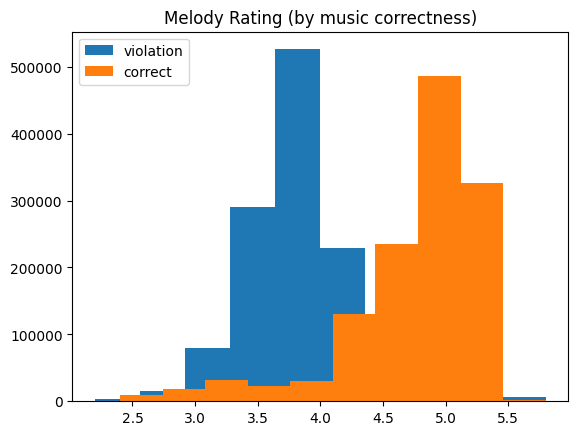

In [70]:
musicViolation = lt_final[(lt_final['Condition']=="EII") | (lt_final['Condition']=="ECI")]
musicCorrect =  lt_final[(lt_final['Condition']=="EIC") | (lt_final['Condition']=="ECC")]
dataset = [musicViolation,musicCorrect]

plt.hist( musicViolation['MelodyRating'], label='violation' )
plt.hist( musicCorrect['MelodyRating'], label='correct' )
plt.legend( )
plt.title( "Melody Rating (by music correctness)" )
plt.savefig('figures/melodyHist.pdf')
plt.show()

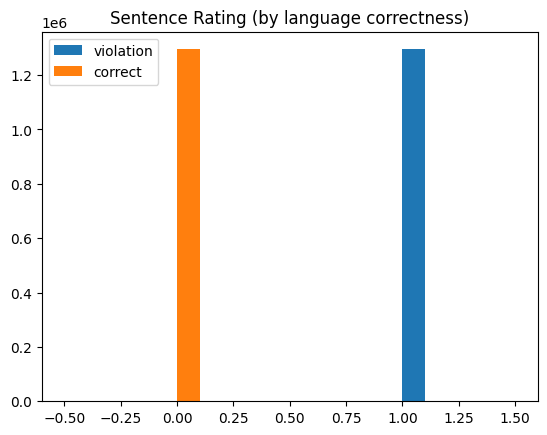

In [69]:
languageViolation = lt_final[(lt_final['Condition']=="EII") | (lt_final['Condition']=="EIC")]
languageCorrect =  lt_final[(lt_final['Condition']=="ECC") | (lt_final['Condition']=="ECI")]

plt.hist( languageViolation['LanguageViolation'], label='violation' )
plt.hist( languageCorrect['LanguageViolation'], label='correct' )
plt.legend( )
plt.title( "Language correctness" )
plt.savefig('figures/sentHist.pdf')
plt.show()